### IMPORTS

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Import the data
df = pd.read_csv('processed.csv', index_col=0)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1295 entries, 0 to 1294
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1295 non-null   object 
 1   NVDA               1295 non-null   float64
 2   000660.KS_pvd      1295 non-null   float64
 3   005930.KS_pvd      1295 non-null   float64
 4   AMD_pvd            1295 non-null   float64
 5   AMZN_pvd           1295 non-null   float64
 6   ASML_pvd           1295 non-null   float64
 7   GOOG_pvd           1295 non-null   float64
 8   MSFT_pvd           1295 non-null   float64
 9   MU_pvd             1295 non-null   float64
 10  NVDA_pvd           1295 non-null   float64
 11  TSM_pvd            1295 non-null   float64
 12  ^GSPC_pvd          1295 non-null   float64
 13  ^IXIC_pvd          1295 non-null   float64
 14  ^SOX_pvd           1295 non-null   float64
 15  Interest Rate_pvd  1295 non-null   float64
 16  50D SMA_pvd        1295 non-n

In [4]:
# Set the Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date column as index
df.set_index('Date', inplace=True)

# Print to check
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1295 entries, 2019-05-13 to 2024-05-07
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NVDA               1295 non-null   float64
 1   000660.KS_pvd      1295 non-null   float64
 2   005930.KS_pvd      1295 non-null   float64
 3   AMD_pvd            1295 non-null   float64
 4   AMZN_pvd           1295 non-null   float64
 5   ASML_pvd           1295 non-null   float64
 6   GOOG_pvd           1295 non-null   float64
 7   MSFT_pvd           1295 non-null   float64
 8   MU_pvd             1295 non-null   float64
 9   NVDA_pvd           1295 non-null   float64
 10  TSM_pvd            1295 non-null   float64
 11  ^GSPC_pvd          1295 non-null   float64
 12  ^IXIC_pvd          1295 non-null   float64
 13  ^SOX_pvd           1295 non-null   float64
 14  Interest Rate_pvd  1295 non-null   float64
 15  50D SMA_pvd        1295 non-null   float64
 16  200D S

<hr style="border: 2px solid black;">

## TRAINING

### SPLIT DATA

In [5]:
# Set X and y variables
X = df.drop('NVDA', axis = 1)   
y = df['NVDA']   

In [6]:
# Check X and y
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [7]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
# Explore the data
display(X_train[0:5])
display(y_train[0:5])
display(X_test[0:5])
display(y_test[0:5])

,000660.KS_pvd,005930.KS_pvd,AMD_pvd,AMZN_pvd,ASML_pvd,GOOG_pvd,MSFT_pvd,MU_pvd,NVDA_pvd,TSM_pvd,^GSPC_pvd,^IXIC_pvd,^SOX_pvd,Interest Rate_pvd,50D SMA_pvd,200D SMA_pvd
Date,,,,,,,,,,,,,,,,
2020-02-03,0.281662,0.292965,0.140280,0.173608,0.104675,0.163277,0.156381,0.317017,0.031494,0.142637,0.327523,0.239030,0.129696,0.293006,0.029501,0.014698
2020-02-04,0.292542,0.307547,0.147172,0.171501,0.112984,0.184491,0.169059,0.327604,0.032688,0.149219,0.335279,0.251811,0.135432,0.293006,0.029693,0.014822
2022-04-20,0.479580,0.578310,0.477667,0.711513,0.487383,0.645885,0.526344,0.622663,0.231661,0.541372,0.737437,0.705419,0.481154,0.054820,0.319796,0.438405
2022-05-13,0.447049,0.531473,0.410974,0.234174,0.385186,0.503366,0.432917,0.545338,0.157712,0.443641,0.561057,0.470728,0.397106,0.149338,0.292143,0.437587
2020-11-11,0.218195,0.384568,0.349686,0.652159,0.240071,0.288878,0.286082,0.352616,0.115696,0.425521,0.433594,0.489816,0.292728,0.009452,0.146031,0.120831


Date
2020-02-03    0.032464
2020-02-04    0.034531
2022-04-20    0.221341
2022-05-13    0.175298
2020-11-11    0.122793
Name: NVDA, dtype: float64

,000660.KS_pvd,005930.KS_pvd,AMD_pvd,AMZN_pvd,ASML_pvd,GOOG_pvd,MSFT_pvd,MU_pvd,NVDA_pvd,TSM_pvd,^GSPC_pvd,^IXIC_pvd,^SOX_pvd,Interest Rate_pvd,50D SMA_pvd,200D SMA_pvd
Date,,,,,,,,,,,,,,,,
2023-02-02,0.292651,0.478412,0.394621,0.217570,0.566169,0.407114,0.430552,0.472757,0.216449,0.515364,0.623746,0.517209,0.460592,0.810964,0.197153,0.260071
2024-02-13,0.790114,0.769831,0.984323,0.844167,0.863896,0.795206,0.952754,0.840038,0.847239,0.838588,0.922932,0.947853,0.843828,1.000000,0.787522,0.884987
2019-08-05,0.116624,0.073166,0.021623,0.087121,0.036323,0.064720,0.051765,0.178763,0.008376,0.040544,0.230249,0.119334,0.051970,0.396975,0.000968,0.003179
2022-12-22,0.163899,0.411563,0.280019,0.046162,0.455099,0.315384,0.404409,0.294086,0.161869,0.366661,0.543940,0.401679,0.350003,0.810964,0.171539,0.284055
2024-02-21,0.854694,0.753584,0.942293,0.795113,0.841278,0.741628,0.915585,0.762151,0.812869,0.794402,0.907575,0.915314,0.817231,1.000000,0.827995,0.909045


Date
2023-02-02    0.224311
2024-02-13    0.839961
2019-08-05    0.005162
2022-12-22    0.146579
2024-02-21    0.783119
Name: NVDA, dtype: float64

<hr style="border:0.9px solid black;">

### MULTIPLE LINEAR REGRESSION

In [9]:
# Instantiate the model
mlr_model = LinearRegression()

In [10]:
# Train the model
mlr_model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Make predictions for the test set
y_pred_mlr = mlr_model.predict(X_test)

In [12]:
# Compare predictions with actual values
display(y_test[0:5])
display(y_pred_mlr[0:5])

Date
2023-02-02    0.224311
2024-02-13    0.839961
2019-08-05    0.005162
2022-12-22    0.146579
2024-02-21    0.783119
Name: NVDA, dtype: float64

array([0.21811921, 0.84804884, 0.00782672, 0.16342142, 0.81811818])

In [13]:
# Make predictions for the train set
y_pred_mlr_tr = mlr_model.predict(X_train)

In [14]:
# Create Series out of y_pred_mlr
sytest_pred_mlr = pd.Series(y_pred_mlr, index=y_test.index)

In [15]:
# Join Series into a DataFrame
ytestdf_mlr = pd.DataFrame({'Actual_test': y_test, 'Predicted_test': sytest_pred_mlr})

# Print to check
print(ytestdf_mlr.info())
print(ytestdf_mlr[0:5])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2023-02-02 to 2024-03-20
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Actual_test     259 non-null    float64
 1   Predicted_test  259 non-null    float64
dtypes: float64(2)
memory usage: 6.1 KB
None
            Actual_test  Predicted_test
Date                                   
2023-02-02     0.224311        0.218119
2024-02-13     0.839961        0.848049
2019-08-05     0.005162        0.007827
2022-12-22     0.146579        0.163421
2024-02-21     0.783119        0.818118


In [16]:
# Create Series out of y_pred_rf_tr
sytrain_pred_mlr = pd.Series(y_pred_mlr_tr, index=y_train.index)

In [17]:
# Join Series into a DataFrame
ytraindf_mlr = pd.DataFrame({'Actual_train': y_train, 'Predicted_train': sytrain_pred_mlr})

# Print to check
print(ytraindf_mlr.info())
print(ytraindf_mlr[0:5])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1036 entries, 2020-02-03 to 2023-06-13
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Actual_train     1036 non-null   float64
 1   Predicted_train  1036 non-null   float64
dtypes: float64(2)
memory usage: 24.3 KB
None
            Actual_train  Predicted_train
Date                                     
2020-02-03      0.032464         0.031400
2020-02-04      0.034531         0.032353
2022-04-20      0.221341         0.229569
2022-05-13      0.175298         0.157845
2020-11-11      0.122793         0.112772


In [18]:
# Reset the index of both DataFrames
ytraindf_mlr.reset_index(inplace=True)
ytestdf_mlr.reset_index(inplace=True)

# Join DataFrames
mlr_df = pd.merge(ytraindf_mlr, ytestdf_mlr, how='outer')

# Print to check
print(mlr_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1295 non-null   datetime64[ns]
 1   Actual_train     1036 non-null   float64       
 2   Predicted_train  1036 non-null   float64       
 3   Actual_test      259 non-null    float64       
 4   Predicted_test   259 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 50.7 KB
None


In [19]:
# Create new columns 
mlr_df['Actual'] = mlr_df['Actual_train'].fillna(mlr_df['Actual_test'])
mlr_df['Predicted'] = mlr_df['Predicted_train'].fillna(mlr_df['Predicted_test'])

# Print to check
print(mlr_df.info())
print(mlr_df[1035:1040])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1295 non-null   datetime64[ns]
 1   Actual_train     1036 non-null   float64       
 2   Predicted_train  1036 non-null   float64       
 3   Actual_test      259 non-null    float64       
 4   Predicted_test   259 non-null    float64       
 5   Actual           1295 non-null   float64       
 6   Predicted        1295 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 70.9 KB
None
           Date  Actual_train  Predicted_train  Actual_test  Predicted_test  \
1035 2023-06-13      0.460123         0.443931          NaN             NaN   
1036 2023-02-02           NaN              NaN     0.224311        0.218119   
1037 2024-02-13           NaN              NaN     0.839961        0.848049   
1038 2019-08-05           NaN       

In [20]:
# Sort by date
mlr_df = mlr_df.sort_values(by='Date')

# Print to check
print(mlr_df.head())

          Date  Actual_train  Predicted_train  Actual_test  Predicted_test  \
407 2019-05-13      0.007432         0.009454          NaN             NaN   
425 2019-05-14      0.008521         0.006998          NaN             NaN   
204 2019-05-15      0.007775         0.008342          NaN             NaN   
190 2019-05-16      0.007960         0.007293          NaN             NaN   
597 2019-05-17      0.006850         0.007774          NaN             NaN   

       Actual  Predicted  
407  0.007432   0.009454  
425  0.008521   0.006998  
204  0.007775   0.008342  
190  0.007960   0.007293  
597  0.006850   0.007774  


<hr style="border:0.9px solid black;">

### RANDOM FOREST REGRESSION

In [21]:
# Instantiate the model
rf_model = RandomForestRegressor()

In [22]:
# Define the hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 8, 10, 12],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8]
}

In [23]:
# Create a GridSearchCV object
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=3)

# Fit the grid search to the training data
rf_grid_search.fit(X_train, y_train)

# Get the best model and its parameters
rf_best_model = rf_grid_search.best_estimator_
rf_best_params = rf_grid_search.best_params_

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.001 total time=   0.2s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.001 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.001 total time=   0.1s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.001 total time=   0.1s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.001 total time=   0.1s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.001 total time=   0.3s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.001 total time=   0.3s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.000 total time=

[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=-0.001 total time=   0.6s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=-0.001 total time=   0.7s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=-0.001 total time=   0.7s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=-0.001 total time=   0.7s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=-0.001 total time=   0.7s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=-0.001 total time=   0.7s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-0.001 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-0.001 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=1, mi

[CV 5/5] END max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=-0.001 total time=   0.4s
[CV 1/5] END max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=-0.001 total time=   0.6s
[CV 2/5] END max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=-0.001 total time=   0.6s
[CV 3/5] END max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=-0.000 total time=   0.6s
[CV 4/5] END max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=-0.001 total time=   0.6s
[CV 5/5] END max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=-0.001 total time=   0.6s
[CV 1/5] END max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=-0.001 total time=   0.7s
[CV 2/5] END max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=-0.001 total time=   0.7s
[CV 3/5] END max_depth=3, min_samples_leaf=2, min_sample

[CV 5/5] END max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.001 total time=   0.3s
[CV 1/5] END max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=-0.001 total time=   0.4s
[CV 2/5] END max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=-0.001 total time=   0.4s
[CV 3/5] END max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=-0.000 total time=   0.5s
[CV 4/5] END max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=-0.001 total time=   0.4s
[CV 5/5] END max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=-0.001 total time=   0.5s
[CV 1/5] END max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=-0.001 total time=   0.6s
[CV 2/5] END max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=-0.001 total time=   0.6s
[CV 3/5] END max_depth=3, min_samples_leaf=4, min_sample

[CV 1/5] END max_depth=3, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=-0.001 total time=   0.3s
[CV 2/5] END max_depth=3, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=-0.001 total time=   0.3s
[CV 3/5] END max_depth=3, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=-0.000 total time=   0.3s
[CV 4/5] END max_depth=3, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=-0.001 total time=   0.3s
[CV 5/5] END max_depth=3, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=-0.001 total time=   0.3s
[CV 1/5] END max_depth=3, min_samples_leaf=4, min_samples_split=15, n_estimators=300;, score=-0.001 total time=   0.4s
[CV 2/5] END max_depth=3, min_samples_leaf=4, min_samples_split=15, n_estimators=300;, score=-0.001 total time=   0.4s
[CV 3/5] END max_depth=3, min_samples_leaf=4, min_samples_split=15, n_estimators=300;, score=-0.001 total time=   0.4s
[CV 4/5] END max_depth=3, min_samples_leaf=4, mi

[CV 2/5] END max_depth=3, min_samples_leaf=8, min_samples_split=10, n_estimators=100;, score=-0.001 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=8, min_samples_split=10, n_estimators=100;, score=-0.000 total time=   0.1s
[CV 4/5] END max_depth=3, min_samples_leaf=8, min_samples_split=10, n_estimators=100;, score=-0.001 total time=   0.2s
[CV 5/5] END max_depth=3, min_samples_leaf=8, min_samples_split=10, n_estimators=100;, score=-0.001 total time=   0.1s
[CV 1/5] END max_depth=3, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=-0.001 total time=   0.3s
[CV 2/5] END max_depth=3, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=-0.001 total time=   0.3s
[CV 3/5] END max_depth=3, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=-0.000 total time=   0.3s
[CV 4/5] END max_depth=3, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=-0.001 total time=   0.3s
[CV 5/5] END max_depth=3, min_samples_leaf=8, mi

[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=-0.000 total time=   1.1s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=-0.000 total time=   1.1s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=-0.000 total time=   1.1s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=-0.000 total time=   1.1s
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.000 total time=   0.2s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.000 total time=   0.2s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.000 total time=   0.2s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=-0.000 total time=   0.2s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_sample

[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=-0.000 total time=   0.9s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=-0.000 total time=   0.9s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=-0.000 total time=   0.9s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=-0.000 total time=   0.9s
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=15, n_estimators=500;, score=-0.000 total time=   1.1s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=15, n_estimators=500;, score=-0.000 total time=   1.2s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=15, n_estimators=500;, score=-0.000 total time=   1.1s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=15, n_estimators=500;, score=-0.000 total time=   1.1s
[CV 5/5] END max_depth=5, min_samples_leaf=1, mi

[CV 2/5] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=-0.000 total time=   0.6s
[CV 3/5] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=-0.000 total time=   0.7s
[CV 4/5] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=-0.000 total time=   0.6s
[CV 5/5] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=-0.000 total time=   0.6s
[CV 1/5] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=-0.000 total time=   0.8s
[CV 2/5] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=-0.000 total time=   0.9s
[CV 3/5] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=-0.000 total time=   0.9s
[CV 4/5] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=-0.000 total time=   0.9s
[CV 5/5] END max_depth=5, min_samples_leaf=2, mi

[CV 2/5] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.000 total time=   0.4s
[CV 3/5] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.000 total time=   0.4s
[CV 4/5] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.000 total time=   0.4s
[CV 5/5] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.000 total time=   0.4s
[CV 1/5] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=-0.000 total time=   0.6s
[CV 2/5] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=-0.000 total time=   0.6s
[CV 3/5] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=-0.000 total time=   0.6s
[CV 4/5] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=-0.000 total time=   0.6s
[CV 5/5] END max_depth=5, min_samples_leaf=4, min_sample

[CV 2/5] END max_depth=5, min_samples_leaf=8, min_samples_split=2, n_estimators=100;, score=-0.000 total time=   0.2s
[CV 3/5] END max_depth=5, min_samples_leaf=8, min_samples_split=2, n_estimators=100;, score=-0.000 total time=   0.2s
[CV 4/5] END max_depth=5, min_samples_leaf=8, min_samples_split=2, n_estimators=100;, score=-0.000 total time=   0.2s
[CV 5/5] END max_depth=5, min_samples_leaf=8, min_samples_split=2, n_estimators=100;, score=-0.000 total time=   0.2s
[CV 1/5] END max_depth=5, min_samples_leaf=8, min_samples_split=2, n_estimators=200;, score=-0.000 total time=   0.4s
[CV 2/5] END max_depth=5, min_samples_leaf=8, min_samples_split=2, n_estimators=200;, score=-0.000 total time=   0.4s
[CV 3/5] END max_depth=5, min_samples_leaf=8, min_samples_split=2, n_estimators=200;, score=-0.000 total time=   0.4s
[CV 4/5] END max_depth=5, min_samples_leaf=8, min_samples_split=2, n_estimators=200;, score=-0.000 total time=   0.4s
[CV 5/5] END max_depth=5, min_samples_leaf=8, min_sample

[CV 2/5] END max_depth=5, min_samples_leaf=8, min_samples_split=10, n_estimators=500;, score=-0.000 total time=   1.0s
[CV 3/5] END max_depth=5, min_samples_leaf=8, min_samples_split=10, n_estimators=500;, score=-0.000 total time=   1.0s
[CV 4/5] END max_depth=5, min_samples_leaf=8, min_samples_split=10, n_estimators=500;, score=-0.000 total time=   1.1s
[CV 5/5] END max_depth=5, min_samples_leaf=8, min_samples_split=10, n_estimators=500;, score=-0.000 total time=   1.1s
[CV 1/5] END max_depth=5, min_samples_leaf=8, min_samples_split=15, n_estimators=100;, score=-0.000 total time=   0.2s
[CV 2/5] END max_depth=5, min_samples_leaf=8, min_samples_split=15, n_estimators=100;, score=-0.000 total time=   0.2s
[CV 3/5] END max_depth=5, min_samples_leaf=8, min_samples_split=15, n_estimators=100;, score=-0.000 total time=   0.2s
[CV 4/5] END max_depth=5, min_samples_leaf=8, min_samples_split=15, n_estimators=100;, score=-0.000 total time=   0.2s
[CV 5/5] END max_depth=5, min_samples_leaf=8, mi

[CV 2/5] END max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-0.000 total time=   1.2s
[CV 3/5] END max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-0.000 total time=   1.2s
[CV 4/5] END max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-0.000 total time=   1.3s
[CV 5/5] END max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-0.000 total time=   1.2s
[CV 1/5] END max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=-0.000 total time=   1.4s
[CV 2/5] END max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=-0.000 total time=   1.4s
[CV 3/5] END max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=-0.000 total time=   1.4s
[CV 4/5] END max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=-0.000 total time=   1.4s
[CV 5/5] END max_depth=8, min_samples_leaf=1, min_sample

[CV 2/5] END max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=-0.000 total time=   0.9s
[CV 3/5] END max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=-0.000 total time=   0.8s
[CV 4/5] END max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=-0.000 total time=   0.9s
[CV 5/5] END max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=-0.000 total time=   0.9s
[CV 1/5] END max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=-0.000 total time=   1.1s
[CV 2/5] END max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=-0.000 total time=   1.2s
[CV 3/5] END max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=-0.000 total time=   1.2s
[CV 4/5] END max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=-0.000 total time=   1.2s
[CV 5/5] END max_depth=8, min_samples_leaf=2, min_sample

[CV 2/5] END max_depth=8, min_samples_leaf=2, min_samples_split=15, n_estimators=200;, score=-0.000 total time=   0.5s
[CV 3/5] END max_depth=8, min_samples_leaf=2, min_samples_split=15, n_estimators=200;, score=-0.000 total time=   0.5s
[CV 4/5] END max_depth=8, min_samples_leaf=2, min_samples_split=15, n_estimators=200;, score=-0.000 total time=   0.5s
[CV 5/5] END max_depth=8, min_samples_leaf=2, min_samples_split=15, n_estimators=200;, score=-0.000 total time=   0.5s
[CV 1/5] END max_depth=8, min_samples_leaf=2, min_samples_split=15, n_estimators=300;, score=-0.000 total time=   0.8s
[CV 2/5] END max_depth=8, min_samples_leaf=2, min_samples_split=15, n_estimators=300;, score=-0.000 total time=   0.8s
[CV 3/5] END max_depth=8, min_samples_leaf=2, min_samples_split=15, n_estimators=300;, score=-0.000 total time=   0.8s
[CV 4/5] END max_depth=8, min_samples_leaf=2, min_samples_split=15, n_estimators=300;, score=-0.000 total time=   0.8s
[CV 5/5] END max_depth=8, min_samples_leaf=2, mi

[CV 2/5] END max_depth=8, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.000 total time=   0.3s
[CV 3/5] END max_depth=8, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.000 total time=   0.3s
[CV 4/5] END max_depth=8, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.000 total time=   0.3s
[CV 5/5] END max_depth=8, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=-0.000 total time=   0.3s
[CV 1/5] END max_depth=8, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.000 total time=   0.6s
[CV 2/5] END max_depth=8, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.000 total time=   0.6s
[CV 3/5] END max_depth=8, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.000 total time=   0.5s
[CV 4/5] END max_depth=8, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-0.000 total time=   0.5s
[CV 5/5] END max_depth=8, min_samples_leaf=4, mi

[CV 2/5] END max_depth=8, min_samples_leaf=8, min_samples_split=2, n_estimators=500;, score=-0.000 total time=   1.2s
[CV 3/5] END max_depth=8, min_samples_leaf=8, min_samples_split=2, n_estimators=500;, score=-0.000 total time=   1.2s
[CV 4/5] END max_depth=8, min_samples_leaf=8, min_samples_split=2, n_estimators=500;, score=-0.000 total time=   1.2s
[CV 5/5] END max_depth=8, min_samples_leaf=8, min_samples_split=2, n_estimators=500;, score=-0.000 total time=   1.2s
[CV 1/5] END max_depth=8, min_samples_leaf=8, min_samples_split=5, n_estimators=100;, score=-0.000 total time=   0.2s
[CV 2/5] END max_depth=8, min_samples_leaf=8, min_samples_split=5, n_estimators=100;, score=-0.000 total time=   0.2s
[CV 3/5] END max_depth=8, min_samples_leaf=8, min_samples_split=5, n_estimators=100;, score=-0.000 total time=   0.2s
[CV 4/5] END max_depth=8, min_samples_leaf=8, min_samples_split=5, n_estimators=100;, score=-0.000 total time=   0.2s
[CV 5/5] END max_depth=8, min_samples_leaf=8, min_sample

[CV 2/5] END max_depth=8, min_samples_leaf=8, min_samples_split=15, n_estimators=400;, score=-0.000 total time=   1.0s
[CV 3/5] END max_depth=8, min_samples_leaf=8, min_samples_split=15, n_estimators=400;, score=-0.000 total time=   1.0s
[CV 4/5] END max_depth=8, min_samples_leaf=8, min_samples_split=15, n_estimators=400;, score=-0.000 total time=   1.0s
[CV 5/5] END max_depth=8, min_samples_leaf=8, min_samples_split=15, n_estimators=400;, score=-0.000 total time=   1.0s
[CV 1/5] END max_depth=8, min_samples_leaf=8, min_samples_split=15, n_estimators=500;, score=-0.000 total time=   1.2s
[CV 2/5] END max_depth=8, min_samples_leaf=8, min_samples_split=15, n_estimators=500;, score=-0.000 total time=   1.2s
[CV 3/5] END max_depth=8, min_samples_leaf=8, min_samples_split=15, n_estimators=500;, score=-0.000 total time=   1.2s
[CV 4/5] END max_depth=8, min_samples_leaf=8, min_samples_split=15, n_estimators=500;, score=-0.000 total time=   1.2s
[CV 5/5] END max_depth=8, min_samples_leaf=8, mi

[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=-0.000 total time=   0.9s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=-0.000 total time=   0.9s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=-0.000 total time=   0.9s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=-0.000 total time=   0.9s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=-0.000 total time=   0.9s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=-0.000 total time=   1.2s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=-0.000 total time=   1.2s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=-0.000 total time=   1.2s
[CV 4/5] END max_depth=10, min_samples_l

[CV 5/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=-0.000 total time=   0.3s
[CV 1/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.000 total time=   0.6s
[CV 2/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.000 total time=   0.6s
[CV 3/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.000 total time=   0.6s
[CV 4/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.000 total time=   0.6s
[CV 5/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.000 total time=   0.6s
[CV 1/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=-0.000 total time=   0.9s
[CV 2/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=-0.000 total time=   1.0s
[CV 3/5] END max_depth=10, min_samples_leaf=2, m

[CV 4/5] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=500;, score=-0.000 total time=   1.4s
[CV 5/5] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=500;, score=-0.000 total time=   1.4s
[CV 1/5] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.000 total time=   0.3s
[CV 2/5] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.000 total time=   0.3s
[CV 3/5] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.000 total time=   0.3s
[CV 4/5] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.000 total time=   0.3s
[CV 5/5] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=-0.000 total time=   0.3s
[CV 1/5] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.000 total time=   0.6s
[CV 2/5] END max_depth=10, min_samples_leaf=4,

[CV 3/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-0.000 total time=   1.2s
[CV 4/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-0.000 total time=   1.1s
[CV 5/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-0.000 total time=   1.1s
[CV 1/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=-0.000 total time=   1.4s
[CV 2/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=-0.000 total time=   1.4s
[CV 3/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=-0.000 total time=   1.5s
[CV 4/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=-0.000 total time=   1.4s
[CV 5/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=-0.000 total time=   1.4s
[CV 1/5] END max_depth=10, min_samples_l

[CV 2/5] END max_depth=10, min_samples_leaf=8, min_samples_split=5, n_estimators=300;, score=-0.000 total time=   0.7s
[CV 3/5] END max_depth=10, min_samples_leaf=8, min_samples_split=5, n_estimators=300;, score=-0.000 total time=   0.7s
[CV 4/5] END max_depth=10, min_samples_leaf=8, min_samples_split=5, n_estimators=300;, score=-0.000 total time=   0.7s
[CV 5/5] END max_depth=10, min_samples_leaf=8, min_samples_split=5, n_estimators=300;, score=-0.000 total time=   0.8s
[CV 1/5] END max_depth=10, min_samples_leaf=8, min_samples_split=5, n_estimators=400;, score=-0.000 total time=   1.0s
[CV 2/5] END max_depth=10, min_samples_leaf=8, min_samples_split=5, n_estimators=400;, score=-0.000 total time=   1.0s
[CV 3/5] END max_depth=10, min_samples_leaf=8, min_samples_split=5, n_estimators=400;, score=-0.000 total time=   1.0s
[CV 4/5] END max_depth=10, min_samples_leaf=8, min_samples_split=5, n_estimators=400;, score=-0.000 total time=   1.0s
[CV 5/5] END max_depth=10, min_samples_leaf=8, m

[CV 1/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.000 total time=   0.7s
[CV 2/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.000 total time=   0.7s
[CV 3/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.000 total time=   0.7s
[CV 4/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.000 total time=   0.7s
[CV 5/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.000 total time=   0.7s
[CV 1/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=-0.000 total time=   1.1s
[CV 2/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=-0.000 total time=   1.0s
[CV 3/5] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=-0.000 total time=   1.0s
[CV 4/5] END max_depth=12, min_samples_leaf=1, m

[CV 5/5] END max_depth=12, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=-0.000 total time=   1.5s
[CV 1/5] END max_depth=12, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-0.000 total time=   0.3s
[CV 2/5] END max_depth=12, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-0.000 total time=   0.3s
[CV 3/5] END max_depth=12, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-0.000 total time=   0.3s
[CV 4/5] END max_depth=12, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-0.000 total time=   0.3s
[CV 5/5] END max_depth=12, min_samples_leaf=1, min_samples_split=15, n_estimators=100;, score=-0.000 total time=   0.3s
[CV 1/5] END max_depth=12, min_samples_leaf=1, min_samples_split=15, n_estimators=200;, score=-0.000 total time=   0.6s
[CV 2/5] END max_depth=12, min_samples_leaf=1, min_samples_split=15, n_estimators=200;, score=-0.000 total time=   0.5s
[CV 3/5] END max_depth=12, min_samples_l

[CV 4/5] END max_depth=12, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=-0.000 total time=   1.3s
[CV 5/5] END max_depth=12, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=-0.000 total time=   1.3s
[CV 1/5] END max_depth=12, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=-0.000 total time=   1.5s
[CV 2/5] END max_depth=12, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=-0.000 total time=   1.6s
[CV 3/5] END max_depth=12, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=-0.000 total time=   1.6s
[CV 4/5] END max_depth=12, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=-0.000 total time=   1.6s
[CV 5/5] END max_depth=12, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=-0.000 total time=   1.6s
[CV 1/5] END max_depth=12, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=-0.000 total time=   0.3s
[CV 2/5] END max_depth=12, min_samples_leaf=2, 

[CV 3/5] END max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=-0.000 total time=   0.8s
[CV 4/5] END max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=-0.000 total time=   0.8s
[CV 5/5] END max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=-0.000 total time=   0.9s
[CV 1/5] END max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=-0.000 total time=   1.1s
[CV 2/5] END max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=-0.000 total time=   1.1s
[CV 3/5] END max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=-0.000 total time=   1.1s
[CV 4/5] END max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=-0.000 total time=   1.1s
[CV 5/5] END max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=-0.000 total time=   1.1s
[CV 1/5] END max_depth=12, min_samples_leaf=4, m

[CV 2/5] END max_depth=12, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=-0.000 total time=   0.5s
[CV 3/5] END max_depth=12, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=-0.000 total time=   0.5s
[CV 4/5] END max_depth=12, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=-0.000 total time=   0.5s
[CV 5/5] END max_depth=12, min_samples_leaf=4, min_samples_split=15, n_estimators=200;, score=-0.000 total time=   0.5s
[CV 1/5] END max_depth=12, min_samples_leaf=4, min_samples_split=15, n_estimators=300;, score=-0.000 total time=   0.8s
[CV 2/5] END max_depth=12, min_samples_leaf=4, min_samples_split=15, n_estimators=300;, score=-0.000 total time=   0.8s
[CV 3/5] END max_depth=12, min_samples_leaf=4, min_samples_split=15, n_estimators=300;, score=-0.000 total time=   0.8s
[CV 4/5] END max_depth=12, min_samples_leaf=4, min_samples_split=15, n_estimators=300;, score=-0.000 total time=   0.8s
[CV 5/5] END max_depth=12, min_samples_l

[CV 1/5] END max_depth=12, min_samples_leaf=8, min_samples_split=10, n_estimators=100;, score=-0.000 total time=   0.2s
[CV 2/5] END max_depth=12, min_samples_leaf=8, min_samples_split=10, n_estimators=100;, score=-0.000 total time=   0.2s
[CV 3/5] END max_depth=12, min_samples_leaf=8, min_samples_split=10, n_estimators=100;, score=-0.000 total time=   0.2s
[CV 4/5] END max_depth=12, min_samples_leaf=8, min_samples_split=10, n_estimators=100;, score=-0.000 total time=   0.2s
[CV 5/5] END max_depth=12, min_samples_leaf=8, min_samples_split=10, n_estimators=100;, score=-0.000 total time=   0.2s
[CV 1/5] END max_depth=12, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=-0.000 total time=   0.5s
[CV 2/5] END max_depth=12, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=-0.000 total time=   0.5s
[CV 3/5] END max_depth=12, min_samples_leaf=8, min_samples_split=10, n_estimators=200;, score=-0.000 total time=   0.5s
[CV 4/5] END max_depth=12, min_samples_l

In [24]:
# Print parameters of best model
print(rf_best_params)

{'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [25]:
# Make predictions for the test set
y_pred_rf = rf_best_model.predict(X_test)

In [26]:
# Compare predictions with actual values
display(y_test[0:5])
display(y_pred_rf[0:5])

Date
2023-02-02    0.224311
2024-02-13    0.839961
2019-08-05    0.005162
2022-12-22    0.146579
2024-02-21    0.783119
Name: NVDA, dtype: float64

array([0.22427465, 0.84516726, 0.00960532, 0.16028572, 0.88237282])

In [27]:
# Make predictions for the train set
y_pred_rf_tr = rf_best_model.predict(X_train)

In [28]:
# Create Series out of y_pred_rf
sytest_pred_rf = pd.Series(y_pred_rf, index=y_test.index)

In [29]:
# Join Series into a DataFrame
ytestdf_rf = pd.DataFrame({'Actual_test': y_test, 'Predicted_test': sytest_pred_rf})

# Print to check
print(ytestdf_rf.info())
print(ytestdf_rf[0:5])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2023-02-02 to 2024-03-20
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Actual_test     259 non-null    float64
 1   Predicted_test  259 non-null    float64
dtypes: float64(2)
memory usage: 6.1 KB
None
            Actual_test  Predicted_test
Date                                   
2023-02-02     0.224311        0.224275
2024-02-13     0.839961        0.845167
2019-08-05     0.005162        0.009605
2022-12-22     0.146579        0.160286
2024-02-21     0.783119        0.882373


In [30]:
# Create Series out of y_pred_rf_tr
sytrain_pred_rf = pd.Series(y_pred_rf_tr, index=y_train.index)

In [31]:
# Join Series into a DataFrame
ytraindf_rf = pd.DataFrame({'Actual_train': y_train, 'Predicted_train': sytrain_pred_rf})

# Print to check
print(ytraindf_rf.info())
print(ytraindf_rf[0:5])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1036 entries, 2020-02-03 to 2023-06-13
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Actual_train     1036 non-null   float64
 1   Predicted_train  1036 non-null   float64
dtypes: float64(2)
memory usage: 24.3 KB
None
            Actual_train  Predicted_train
Date                                     
2020-02-03      0.032464         0.033009
2020-02-04      0.034531         0.034091
2022-04-20      0.221341         0.222683
2022-05-13      0.175298         0.169370
2020-11-11      0.122793         0.119291


In [32]:
# Reset the index of both DataFrames
ytraindf_rf.reset_index(inplace=True)
ytestdf_rf.reset_index(inplace=True)

# Join DataFrames
rf_df = pd.merge(ytraindf_rf, ytestdf_rf, how='outer')

# Print to check
print(rf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1295 non-null   datetime64[ns]
 1   Actual_train     1036 non-null   float64       
 2   Predicted_train  1036 non-null   float64       
 3   Actual_test      259 non-null    float64       
 4   Predicted_test   259 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 50.7 KB
None


In [33]:
# Create new columns 
rf_df['Actual'] = rf_df['Actual_train'].fillna(rf_df['Actual_test'])
rf_df['Predicted'] = rf_df['Predicted_train'].fillna(rf_df['Predicted_test'])

# Print to check
print(rf_df.info())
print(rf_df[1035:1040])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1295 non-null   datetime64[ns]
 1   Actual_train     1036 non-null   float64       
 2   Predicted_train  1036 non-null   float64       
 3   Actual_test      259 non-null    float64       
 4   Predicted_test   259 non-null    float64       
 5   Actual           1295 non-null   float64       
 6   Predicted        1295 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 70.9 KB
None
           Date  Actual_train  Predicted_train  Actual_test  Predicted_test  \
1035 2023-06-13      0.460123         0.455241          NaN             NaN   
1036 2023-02-02           NaN              NaN     0.224311        0.224275   
1037 2024-02-13           NaN              NaN     0.839961        0.845167   
1038 2019-08-05           NaN       

In [34]:
# Sort by date
rf_df = rf_df.sort_values(by='Date')

# Print to check
print(rf_df.head())

          Date  Actual_train  Predicted_train  Actual_test  Predicted_test  \
407 2019-05-13      0.007432         0.008363          NaN             NaN   
425 2019-05-14      0.008521         0.007458          NaN             NaN   
204 2019-05-15      0.007775         0.008097          NaN             NaN   
190 2019-05-16      0.007960         0.007795          NaN             NaN   
597 2019-05-17      0.006850         0.007400          NaN             NaN   

       Actual  Predicted  
407  0.007432   0.008363  
425  0.008521   0.007458  
204  0.007775   0.008097  
190  0.007960   0.007795  
597  0.006850   0.007400  


<hr style="border:0.9px solid black;">

### XGBOOST REGRESSION

In [35]:
# Instantiate the model
xgb_model = XGBRegressor()

In [36]:
# Define the hyperparameter grid
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 8, 10, 12],
    'subsample': [0.5, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.8, 1.0]
}

In [37]:
# Create a GridSearchCV object
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=3)

# Fit the grid search to the training data
xgb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5;, score=-0.007 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5;, score=-0.008 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5;, score=-0.007 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5;, score=-0.009 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5;, score=-0.009 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7;, score=-0.007 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7;, score=-0.008 total time=   0.

[CV 3/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.01, max_dep

[CV 1/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7;, score=-0.001 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7;, score=-0.001 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7;, score=-0.001 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7;, score=-0.001 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7;, score=-0.001 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8;, score=-0.001 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8;, score=-0.001 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.01, max_dep

[CV 3/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.01, max_dep

[CV 5/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, max_dep

[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8;, score=-0.008 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8;, score=-0.007 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8;, score=-0.009 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8;, score=-0.009 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0;, score=-0.007 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0;, score=-0.008 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0;, score=-0.007 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.01, 

[CV 3/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.5s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.5s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.5s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.5s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.6s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.5s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.5s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.01, 

[CV 5/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.001 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=1.0;, score=-0.001 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=1.0;, score=-0.001 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=1.0;, score=-0.001 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=1.0;, score=-0.001 total time=   0.3s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=1.0;, score=-0.001 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=12, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, 

[CV 1/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.7s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.7s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.8s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.7s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.7s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.05, ma

[CV 3/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.05, max_dep

[CV 2/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.05, max_dep

[CV 4/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.3s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.05, max_dep

[CV 1/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.05, max_dep

[CV 3/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.05, 

[CV 4/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.3s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.3s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.05, 

[CV 5/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.3s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.4s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.05, 

[CV 1/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.5s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.4s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.4s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.4s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.05, 

[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_

[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_

[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_

[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=8, n_

[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_dept

[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_dept

[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=12, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=12, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_dept

[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.1, max_dept

[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_

[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_

[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_

[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=8, n_

[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_dept

[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_dept

[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_dept

[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5;, score=-0.007 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.01, max_dep

[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_dep

[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.001 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.001 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.002 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7;, score=-0.001 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7;, score=-0.001 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7;, score=-0.001 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.7;, score=-0.001 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_dep

[CV 1/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.3s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_dep

[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.3s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_dep

[CV 2/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8;, score=-0.008 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8;, score=-0.007 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8;, score=-0.009 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8;, score=-0.009 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0;, score=-0.007 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0;, score=-0.008 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0;, score=-0.007 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, 

[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.4s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.5s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.4s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.4s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.4s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.5s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.4s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, 

[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.001 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.001 total time=   0.3s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=1.0;, score=-0.001 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=1.0;, score=-0.001 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=1.0;, score=-0.001 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=1.0;, score=-0.001 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=1.0;, score=-0.001 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.01, 

[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.8s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.8s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.7s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.8s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.7s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.8s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.05, m

[CV 2/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.05, max_dep

[CV 1/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.05, max_dep

[CV 3/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.3s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.4s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.05, max_dep

[CV 5/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.3s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.3s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.3s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.4s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.4s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.3s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.05, max_dep

[CV 3/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.05, 

[CV 4/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.6s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=17.9min
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.8s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.7s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.6s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.6s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.4s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.05, 

[CV 5/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.05, 

[CV 1/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.3s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.3s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.05, 

[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_

[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.0s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_

[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.5s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=16.1min
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.7s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.6s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.6s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.5s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.4s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_

[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.4s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.3s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.4s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=31.3min
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   1.2s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.4s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.4s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, n_

[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_dept

[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_dept

[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_dept

[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_dept

[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_

[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_

[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.3s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_

[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=8, n_

[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_dept

[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_dept

[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_dept

[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_dept

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_dep

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8;, score=-0.009 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.007 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.008 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.007 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.009 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.009 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.5;, score=-0.001 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_dep

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.3s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_dep

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=200, subsample=1.0;, score=-0.001 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_dep

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.009 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.009 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.007 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.008 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.007 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.009 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.009 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, 

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.3s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.4s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.4s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.4s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.4s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.4s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.4s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, 

[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.001 total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.001 total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.001 total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.001 total time=   0.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.001 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.001 total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.001 total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, 

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.8s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.7s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.7s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.7s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.6s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.6s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.6s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, 

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.05, max_dep

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.05, max_dep

[CV 1/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.05, max_dep

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.05, max_dep

[CV 1/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.05, 

[CV 2/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.3s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.3s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.3s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.3s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.3s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.3s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.3s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.05, 

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.05, 

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.4s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.3s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.3s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.3s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.3s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.3s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.05, 

[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_

[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_

[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=

[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_dept

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=12, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=12, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_dept

[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.3s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.3s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.5s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_dept

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_

[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=8, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=8, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=8, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=8, n_

[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_dept

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_dept

[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_dept

[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_dept

[CV 2/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.01, max_dep

[CV 4/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8;, score=-0.009 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8;, score=-0.009 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.007 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.008 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.007 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.009 total time=   0.0s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.009 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.01, max_dep

[CV 1/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.3s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.01, max_dep

[CV 3/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=200, subsample=1.0;, score=-0.001 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=200, subsample=1.0;, score=-0.001 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=200, subsample=1.0;, score=-0.001 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.01, max_dep

[CV 5/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=8, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.5s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.007 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.008 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.007 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.009 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.009 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.7;, score=-0.007 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.01, m

[CV 1/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.4s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.3s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.4s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.4s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.4s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.4s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.4s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.01, 

[CV 3/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=0.5;, score=-0.001 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=0.5;, score=-0.002 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=0.5;, score=-0.002 total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.001 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.001 total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.001 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.001 total time=   0.3s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.01, 

[CV 4/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.6s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.5s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.6s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.6s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.6s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.6s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.01, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.7s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.01, 

[CV 2/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.05, max_dep

[CV 1/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.05, max_dep

[CV 3/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.05, max_dep

[CV 5/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.05, max_dep

[CV 2/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.3s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=8, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.05, max_

[CV 3/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.3s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.4s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.4s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.4s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.05, 

[CV 4/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.4s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.05, 

[CV 5/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.4s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.5;, score=-0.000 total time=17.0min
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.5;, score=-0.000 total time=   1.5s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.5;, score=-0.000 total time=  -0.9s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.8s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.7s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.05, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.5s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.05, 

[CV 2/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_

[CV 5/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_

[CV 2/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_

[CV 4/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_

[CV 1/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.3s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=8, n_

[CV 4/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.1, max_dept

[CV 1/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=12, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=12, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=12, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=12, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=12, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=12, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.4s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=12, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.3s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.1, max_dept

[CV 3/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=12, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=12, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=12, n_estimators=400, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.4s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.4s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.5s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=12, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.4s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.1, max_dept

[CV 5/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_

[CV 5/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.5;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.7;, score=-0.000 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8;, score=-0.000 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_

[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=400, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=400, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_

[CV 5/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=8, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=8, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=8, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=8, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=8, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=8, n_estimators=200, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=8, n_estimators=200, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=8, n_

[CV 3/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=8, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=8, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=8, n_estimators=500, subsample=0.8;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=8, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=8, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=8, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=8, n_estimators=500, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=8, n_

[CV 1/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=300, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=400, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.2, max_dept

[CV 5/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=12, n_estimators=100, subsample=1.0;, score=-0.000 total time=   0.1s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=12, n_estimators=200, subsample=0.7;, score=-0.000 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_dept

[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.3s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.3s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=0.5;, score=-0.000 total time=   0.3s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=12, n_estimators=500, subsample=0.7;, score=-0.000 total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.2, max_dept

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 10, 12],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'subsample': [0.5, 0.7, 0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=3)

In [38]:
# Get the best model and its parameters
xgb_best_model = xgb_grid_search.best_estimator_
xgb_best_params = xgb_grid_search.best_params_

In [39]:
# Print parameters of best model
print(xgb_best_params)

{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [40]:
# Make predictions for the test set
y_pred_xgb = xgb_best_model.predict(X_test)

In [41]:
# Compare predictions with actual values
display(y_test[0:5])
display(y_pred_xgb[0:5])

Date
2023-02-02    0.224311
2024-02-13    0.839961
2019-08-05    0.005162
2022-12-22    0.146579
2024-02-21    0.783119
Name: NVDA, dtype: float64

array([0.2100167 , 0.8612606 , 0.00939737, 0.15888754, 0.8676935 ],
      dtype=float32)

In [42]:
# Make predictions for the train set
y_pred_xgb_tr = xgb_best_model.predict(X_train)

In [43]:
# Create Series out of y_pred_xgb
sytest_pred_xgb = pd.Series(y_pred_xgb, index=y_test.index)

In [44]:
# Join Series into a DataFrame
ytestdf_xgb = pd.DataFrame({'Actual_test': y_test, 'Predicted_test': sytest_pred_xgb})

# Print to check
print(ytestdf_xgb.info())
print(ytestdf_xgb[0:5])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2023-02-02 to 2024-03-20
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Actual_test     259 non-null    float64
 1   Predicted_test  259 non-null    float32
dtypes: float32(1), float64(1)
memory usage: 5.1 KB
None
            Actual_test  Predicted_test
Date                                   
2023-02-02     0.224311        0.210017
2024-02-13     0.839961        0.861261
2019-08-05     0.005162        0.009397
2022-12-22     0.146579        0.158888
2024-02-21     0.783119        0.867693


In [45]:
# Create Series out of y_pred_xgb_tr
sytrain_pred_xgb = pd.Series(y_pred_xgb_tr, index=y_train.index)

In [46]:
# Join Series into a DataFrame
ytraindf_xgb = pd.DataFrame({'Actual_train': y_train, 'Predicted_train': sytrain_pred_xgb})

# Print to check
print(ytraindf_xgb.info())
print(ytraindf_xgb[0:5])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1036 entries, 2020-02-03 to 2023-06-13
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Actual_train     1036 non-null   float64
 1   Predicted_train  1036 non-null   float32
dtypes: float32(1), float64(1)
memory usage: 20.2 KB
None
            Actual_train  Predicted_train
Date                                     
2020-02-03      0.032464         0.032952
2020-02-04      0.034531         0.033080
2022-04-20      0.221341         0.217842
2022-05-13      0.175298         0.167453
2020-11-11      0.122793         0.117239


In [47]:
# Reset the index of both DataFrames
ytraindf_xgb.reset_index(inplace=True)
ytestdf_xgb.reset_index(inplace=True)

# Join DataFrames
xgb_df = pd.merge(ytraindf_xgb, ytestdf_xgb, how='outer')

# Print to check
print(xgb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1295 non-null   datetime64[ns]
 1   Actual_train     1036 non-null   float64       
 2   Predicted_train  1036 non-null   float32       
 3   Actual_test      259 non-null    float64       
 4   Predicted_test   259 non-null    float32       
dtypes: datetime64[ns](1), float32(2), float64(2)
memory usage: 40.6 KB
None


In [48]:
# Create new columns 
xgb_df['Actual'] = xgb_df['Actual_train'].fillna(xgb_df['Actual_test'])
xgb_df['Predicted'] = xgb_df['Predicted_train'].fillna(xgb_df['Predicted_test'])

# Print to check
print(xgb_df.info())
print(xgb_df[1035:1040])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1295 non-null   datetime64[ns]
 1   Actual_train     1036 non-null   float64       
 2   Predicted_train  1036 non-null   float32       
 3   Actual_test      259 non-null    float64       
 4   Predicted_test   259 non-null    float32       
 5   Actual           1295 non-null   float64       
 6   Predicted        1295 non-null   float32       
dtypes: datetime64[ns](1), float32(3), float64(3)
memory usage: 55.8 KB
None
           Date  Actual_train  Predicted_train  Actual_test  Predicted_test  \
1035 2023-06-13      0.460123         0.456505          NaN             NaN   
1036 2023-02-02           NaN              NaN     0.224311        0.210017   
1037 2024-02-13           NaN              NaN     0.839961        0.861261   
1038 2019-08-05         

In [49]:
# Sort by date
xgb_df = xgb_df.sort_values(by='Date')

# Print to check
print(xgb_df.head())

          Date  Actual_train  Predicted_train  Actual_test  Predicted_test  \
407 2019-05-13      0.007432         0.008799          NaN             NaN   
425 2019-05-14      0.008521         0.007523          NaN             NaN   
204 2019-05-15      0.007775         0.007586          NaN             NaN   
190 2019-05-16      0.007960         0.008033          NaN             NaN   
597 2019-05-17      0.006850         0.007462          NaN             NaN   

       Actual  Predicted  
407  0.007432   0.008799  
425  0.008521   0.007523  
204  0.007775   0.007586  
190  0.007960   0.008033  
597  0.006850   0.007462  


<hr style="border: 2px solid black;">

## EVALUATION

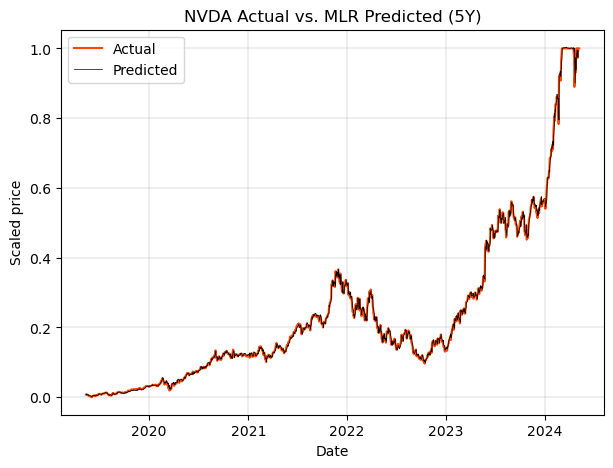

In [50]:
# Create lineplot of Actual vs Predicted - MLR model

# Create figure and axes
plt.figure(figsize=(7, 5))

# Plot top axes
sns.lineplot(data=mlr_df, x='Date', y='Actual', label='Actual', color='orangered')
sns.lineplot(data=mlr_df, x='Date', y='Predicted', label='Predicted', color='black', linewidth=0.5)
plt.title('NVDA Actual vs. MLR Predicted (5Y)')
plt.xlabel('Date')
plt.ylabel('Scaled price')
plt.grid(linewidth=0.3)

plt.show()

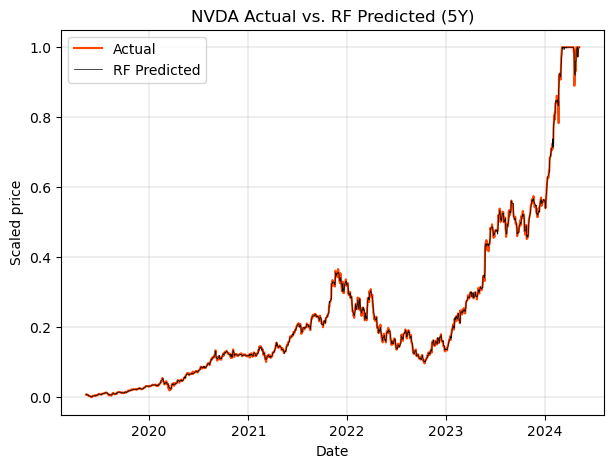

In [51]:
# Create lineplot of Actual vs Predicted - RF model

# Create figure and axes
plt.figure(figsize=(7, 5))

# Plot top axes
sns.lineplot(data=rf_df, x='Date', y='Actual', label='Actual', color='orangered')
sns.lineplot(data=rf_df, x='Date', y='Predicted', label='RF Predicted', color='black', linewidth=0.5)
plt.title('NVDA Actual vs. RF Predicted (5Y)')
plt.xlabel('Date')
plt.ylabel('Scaled price')
plt.grid(linewidth=0.3)

plt.show()

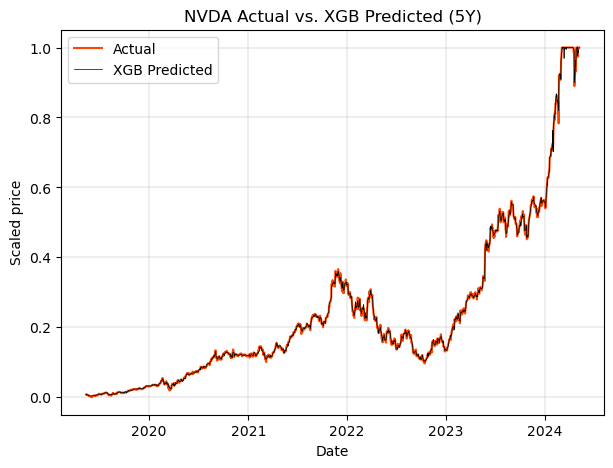

In [52]:
# Create lineplot of Actual vs Predicted - XGB model

# Create figure and axes
plt.figure(figsize=(7, 5))

# Plot top axes
sns.lineplot(data=xgb_df, x='Date', y='Actual', label='Actual', color='orangered')
sns.lineplot(data=xgb_df, x='Date', y='Predicted', label='XGB Predicted', color='black', linewidth=0.5)
plt.title('NVDA Actual vs. XGB Predicted (5Y)')
plt.xlabel('Date')
plt.ylabel('Scaled price')
plt.grid(linewidth=0.3)

plt.show()

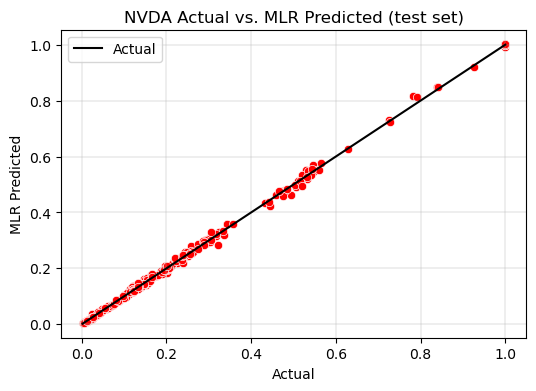

In [53]:
# Create scatter plot of Actual vs Predicted - MLR model

# Create figure and axes
plt.figure(figsize=(6, 4))

sns.scatterplot(x=y_test, y=y_pred_mlr, color='red', marker='o')
sns.lineplot(x=y_test, y=y_test, label='Actual', color='black')

plt.title('NVDA Actual vs. MLR Predicted (test set)')
plt.xlabel('Actual')
plt.ylabel('MLR Predicted')
plt.grid(linewidth=0.3)

plt.show()

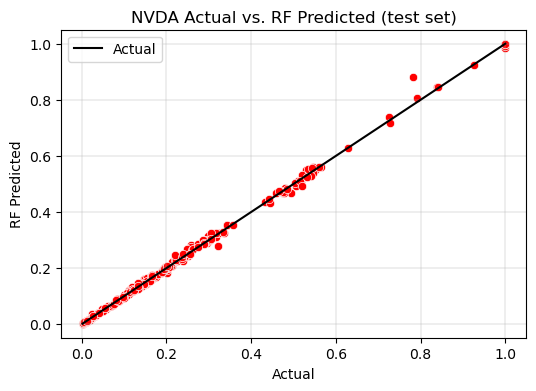

In [54]:
# Create scatter plot of Actual vs Predicted - RF model

# Create figure and axes
plt.figure(figsize=(6, 4))

sns.scatterplot(x=y_test, y=y_pred_rf, color='red', marker='o')
sns.lineplot(x=y_test, y=y_test, label='Actual', color='black')

plt.title('NVDA Actual vs. RF Predicted (test set)')
plt.xlabel('Actual')
plt.ylabel('RF Predicted')
plt.grid(linewidth=0.3)

plt.show()

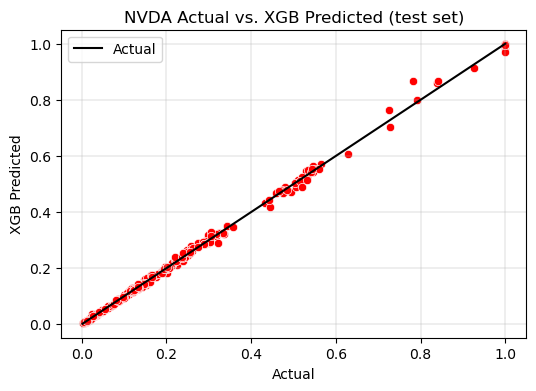

In [55]:
# Create scatter plot of Actual vs Predicted - XGB model

# Create figure and axes
plt.figure(figsize=(6, 4))

sns.scatterplot(x=y_test, y=y_pred_xgb, color='red', marker='o')
sns.lineplot(x=y_test, y=y_test, label='Actual', color='black')

plt.title('NVDA Actual vs. XGB Predicted (test set)')
plt.xlabel('Actual')
plt.ylabel('XGB Predicted')
plt.grid(linewidth=0.3)

plt.show()

In [56]:
# Calculate evaluation metrics

# Create lists of metrics and models
metrics = ['MSE', 'RMSE', 'MAE', 'R2']
models = ['mlr', 'rf', 'xgb']

# Create dictionary of model predictions
model_predictions = {'mlr': y_pred_mlr,
                     'rf': y_pred_rf,
                     'xgb': y_pred_xgb}

# Create Score DataFrame
score_df = pd.DataFrame(columns=metrics, index=models, dtype=float)

for model in models:
    y_pred = model_predictions[model]
    mse = mean_squared_error(y_test, y_pred)
    score_df.loc[model, 'MSE'] = mse
    score_df.loc[model, 'RMSE'] = np.sqrt(mse)
    score_df.loc[model, 'MAE'] = mean_absolute_error(y_test, y_pred)
    score_df.loc[model, 'R2'] = r2_score(y_test, y_pred)

# Print to check
display(score_df)

,MSE,RMSE,MAE,R2
mlr,0.000066,0.008134,0.005409,0.998765
rf,0.000095,0.009731,0.005247,0.998232
xgb,0.000099,0.009974,0.005815,0.998143


<hr style="border: 2px solid black;">

## PREDICT NEW DATA

### FUTURE DATA

In [57]:
# Import new data
new_df = pd.read_csv('processed_new.csv', index_col=0)
print(new_df.info())
print(new_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 5
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               6 non-null      object 
 1   NVDA               6 non-null      float64
 2   000660.KS_pvd      6 non-null      float64
 3   005930.KS_pvd      6 non-null      float64
 4   AMD_pvd            6 non-null      float64
 5   AMZN_pvd           6 non-null      float64
 6   ASML_pvd           6 non-null      float64
 7   GOOG_pvd           6 non-null      float64
 8   MSFT_pvd           6 non-null      float64
 9   MU_pvd             6 non-null      float64
 10  NVDA_pvd           6 non-null      float64
 11  TSM_pvd            6 non-null      float64
 12  ^GSPC_pvd          6 non-null      float64
 13  ^IXIC_pvd          6 non-null      float64
 14  ^SOX_pvd           6 non-null      float64
 15  Interest Rate_pvd  6 non-null      float64
 16  50D SMA_pvd        6 non-null      

In [58]:
# Set the Date to datetime
new_df['Date'] = pd.to_datetime(new_df['Date'])

# Set Date column as index
new_df.set_index('Date', inplace=True)

# Print to check
print(new_df.info())
print(new_df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2024-05-08 to 2024-05-15
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NVDA               6 non-null      float64
 1   000660.KS_pvd      6 non-null      float64
 2   005930.KS_pvd      6 non-null      float64
 3   AMD_pvd            6 non-null      float64
 4   AMZN_pvd           6 non-null      float64
 5   ASML_pvd           6 non-null      float64
 6   GOOG_pvd           6 non-null      float64
 7   MSFT_pvd           6 non-null      float64
 8   MU_pvd             6 non-null      float64
 9   NVDA_pvd           6 non-null      float64
 10  TSM_pvd            6 non-null      float64
 11  ^GSPC_pvd          6 non-null      float64
 12  ^IXIC_pvd          6 non-null      float64
 13  ^SOX_pvd           6 non-null      float64
 14  Interest Rate_pvd  6 non-null      float64
 15  50D SMA_pvd        6 non-null      float64
 16  200D SMA_

In [59]:
# Set X and y variables
X_new = new_df.drop('NVDA', axis = 1)   
y_new = new_df['NVDA']   

In [60]:
# Make predictions for new data
y_pred_mlr_new = mlr_model.predict(X_new)
y_pred_rf_new= rf_best_model.predict(X_new)
y_pred_xgb_new = xgb_best_model.predict(X_new)

# Create Series 
sy_pred_mlr_new = pd.Series(y_pred_mlr_new, index=y_new.index)
sy_pred_rf_new = pd.Series(y_pred_rf_new, index=y_new.index)
sy_pred_xgb_new = pd.Series(y_pred_xgb_new, index=y_new.index)

# Join Series into a DataFrame
new_pred = pd.DataFrame({'Actual': y_new, 
                         'Predicted MLR': sy_pred_mlr_new,
                         'Predicted RF': sy_pred_rf_new,
                         'Predicted XGB': sy_pred_xgb_new})

# Print predictions
display(new_pred)

,Actual,Predicted MLR,Predicted RF,Predicted XGB
Date,,,,
2024-05-08,1.063230,1.076160,0.999837,0.998846
2024-05-09,1.042902,1.074585,0.999854,1.000005
2024-05-10,1.056710,1.055458,0.999373,0.998222
2024-05-13,1.063071,1.069702,0.999384,0.998078
2024-05-14,1.074755,1.075017,0.999373,0.999987
2024-05-15,1.114727,1.085137,0.999854,1.000261


In [61]:
# Create list of prediction columns
columns_prediction = ['Predicted MLR', 'Predicted RF', 'Predicted XGB']

# Create columns for error
for column in columns_prediction:
    new_pred[f'{column[9:]} error'] = new_pred['Actual'] - new_pred[column]
    
# Print predictions and error
display(new_pred)

,Actual,Predicted MLR,Predicted RF,Predicted XGB,MLR error,RF error,XGB error
Date,,,,,,,
2024-05-08,1.063230,1.076160,0.999837,0.998846,-0.012930,0.063393,0.064384
2024-05-09,1.042902,1.074585,0.999854,1.000005,-0.031683,0.043048,0.042897
2024-05-10,1.056710,1.055458,0.999373,0.998222,0.001252,0.057338,0.058488
2024-05-13,1.063071,1.069702,0.999384,0.998078,-0.006631,0.063687,0.064993
2024-05-14,1.074755,1.075017,0.999373,0.999987,-0.000262,0.075382,0.074768
2024-05-15,1.114727,1.085137,0.999854,1.000261,0.029590,0.114873,0.114466


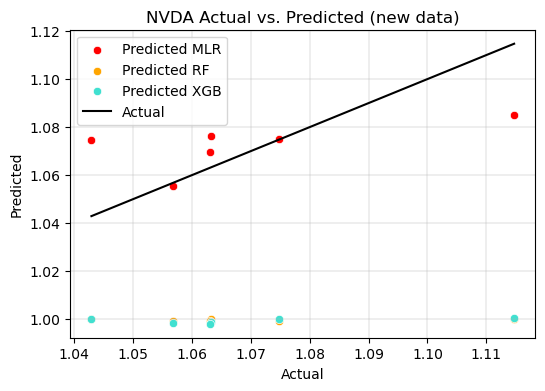

In [79]:
# Create scatter plot of Actual vs Predicted - all models

# Create figure and axes
plt.figure(figsize=(6, 4))

sns.scatterplot(x=new_pred['Actual'], y=new_pred['Predicted MLR'], label='Predicted MLR', color='red', marker='o')
sns.scatterplot(x=new_pred['Actual'], y=new_pred['Predicted RF'], label='Predicted RF', color='orange', marker='o')
sns.scatterplot(x=new_pred['Actual'], y=new_pred['Predicted XGB'], label='Predicted XGB', color='turquoise', marker='o')
sns.lineplot(x=new_pred['Actual'], y=new_pred['Actual'], label='Actual', color='black')

plt.title('NVDA Actual vs. Predicted (new data)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(linewidth=0.3)

plt.show()

<hr style="border:0.9px solid black;">

### PAST DATA

In [68]:
# Import new data
past_df = pd.read_csv('processed_past.csv', index_col=0)
print(past_df.info())
print(past_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1294 entries, 0 to 1293
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1294 non-null   object 
 1   NVDA               1294 non-null   float64
 2   000660.KS_pvd      1294 non-null   float64
 3   005930.KS_pvd      1294 non-null   float64
 4   AMD_pvd            1294 non-null   float64
 5   AMZN_pvd           1294 non-null   float64
 6   ASML_pvd           1294 non-null   float64
 7   GOOG_pvd           1294 non-null   float64
 8   MSFT_pvd           1294 non-null   float64
 9   MU_pvd             1294 non-null   float64
 10  NVDA_pvd           1294 non-null   float64
 11  TSM_pvd            1294 non-null   float64
 12  ^GSPC_pvd          1294 non-null   float64
 13  ^IXIC_pvd          1294 non-null   float64
 14  ^SOX_pvd           1294 non-null   float64
 15  Interest Rate_pvd  1294 non-null   float64
 16  50D SMA_pvd        1294 non-n

In [69]:
# Set the Date to datetime
past_df['Date'] = pd.to_datetime(past_df['Date'])

# Set Date column as index
past_df.set_index('Date', inplace=True)

# Print to check
print(past_df.info())
print(past_df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1294 entries, 2014-05-13 to 2019-05-09
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NVDA               1294 non-null   float64
 1   000660.KS_pvd      1294 non-null   float64
 2   005930.KS_pvd      1294 non-null   float64
 3   AMD_pvd            1294 non-null   float64
 4   AMZN_pvd           1294 non-null   float64
 5   ASML_pvd           1294 non-null   float64
 6   GOOG_pvd           1294 non-null   float64
 7   MSFT_pvd           1294 non-null   float64
 8   MU_pvd             1294 non-null   float64
 9   NVDA_pvd           1294 non-null   float64
 10  TSM_pvd            1294 non-null   float64
 11  ^GSPC_pvd          1294 non-null   float64
 12  ^IXIC_pvd          1294 non-null   float64
 13  ^SOX_pvd           1294 non-null   float64
 14  Interest Rate_pvd  1294 non-null   float64
 15  50D SMA_pvd        1294 non-null   float64
 16  200D S

In [70]:
# Set X and y variables
X_past = past_df.drop('NVDA', axis = 1)   
y_past = past_df['NVDA']   

In [71]:
# Make predictions for new data
y_pred_mlr_past = mlr_model.predict(X_past)
y_pred_rf_past= rf_best_model.predict(X_past)
y_pred_xgb_past = xgb_best_model.predict(X_past)

# Create Series 
sy_pred_mlr_past = pd.Series(y_pred_mlr_past, index=y_past.index)
sy_pred_rf_past = pd.Series(y_pred_rf_past, index=y_past.index)
sy_pred_xgb_past = pd.Series(y_pred_xgb_past, index=y_past.index)

# Join Series into a DataFrame
past_pred = pd.DataFrame({'Actual': y_past, 
                         'Predicted MLR': sy_pred_mlr_past,
                         'Predicted RF': sy_pred_rf_past,
                         'Predicted XGB': sy_pred_xgb_past})

# Print predictions
display(past_pred)

,Actual,Predicted MLR,Predicted RF,Predicted XGB
Date,,,,
2014-05-13,-0.035314,-0.036678,0.001999,0.008228
2014-05-14,-0.035366,-0.036669,0.001999,0.008228
2014-05-15,-0.035395,-0.036645,0.001999,0.008228
2014-05-16,-0.035407,-0.036575,0.001999,0.008228
2014-05-19,-0.035239,-0.036656,0.001999,0.008228
...,...,...,...,...
2019-05-03,0.014878,0.013215,0.012312,0.012261
2019-05-06,0.013920,0.013115,0.013801,0.012371
2019-05-07,0.011877,0.012367,0.011265,0.010793


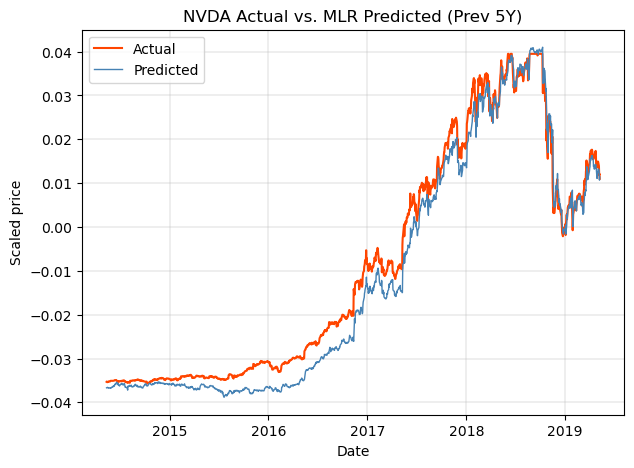

In [81]:
# Create lineplot of Actual vs Predicted - MLR model

# Create figure and axes
plt.figure(figsize=(7, 5))

# Plot top axes
sns.lineplot(data=past_pred, x='Date', y='Actual', label='Actual', color='orangered')
sns.lineplot(data=past_pred, x='Date', y='Predicted MLR', label='Predicted', color='steelblue', linewidth=1)
plt.title('NVDA Actual vs. MLR Predicted (Prev 5Y)')
plt.xlabel('Date')
plt.ylabel('Scaled price')
plt.grid(linewidth=0.3)

plt.show()

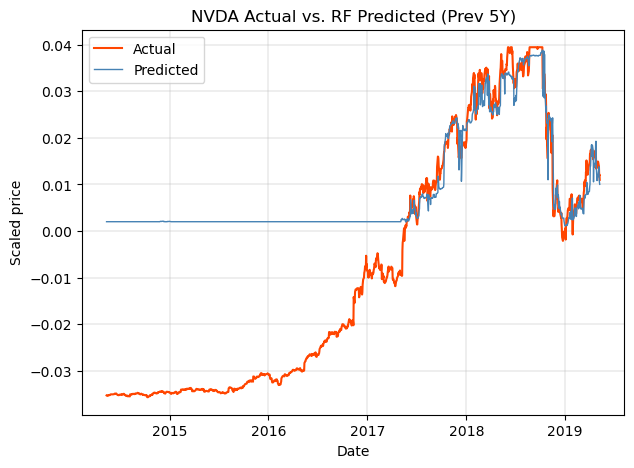

In [80]:
# Create lineplot of Actual vs Predicted - RF model

# Create figure and axes
plt.figure(figsize=(7, 5))

# Plot top axes
sns.lineplot(data=past_pred, x='Date', y='Actual', label='Actual', color='orangered')
sns.lineplot(data=past_pred, x='Date', y='Predicted RF', label='Predicted', color='steelblue', linewidth=1)
plt.title('NVDA Actual vs. RF Predicted (Prev 5Y)')
plt.xlabel('Date')
plt.ylabel('Scaled price')
plt.grid(linewidth=0.3)

plt.show()

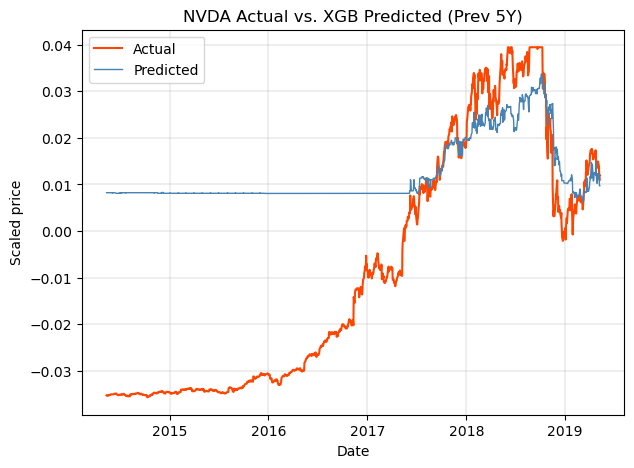

In [82]:
# Create lineplot of Actual vs Predicted - XGB model

# Create figure and axes
plt.figure(figsize=(7, 5))

# Plot top axes
sns.lineplot(data=past_pred, x='Date', y='Actual', label='Actual', color='orangered')
sns.lineplot(data=past_pred, x='Date', y='Predicted XGB', label='Predicted', color='steelblue', linewidth=1)
plt.title('NVDA Actual vs. XGB Predicted (Prev 5Y)')
plt.xlabel('Date')
plt.ylabel('Scaled price')
plt.grid(linewidth=0.3)

plt.show()

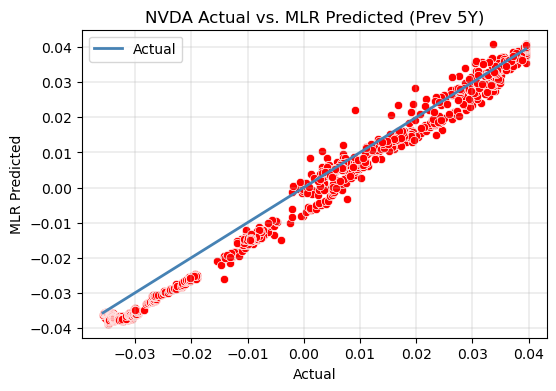

In [84]:
# Create scatter plot of Actual vs Predicted - MLR model

# Create figure and axes
plt.figure(figsize=(6, 4))

sns.scatterplot(data=past_pred, x='Actual', y='Predicted MLR', color='red', marker='o')
sns.lineplot(data=past_pred, x='Actual', y='Actual', label='Actual', color='steelblue', linewidth=2)

plt.title('NVDA Actual vs. MLR Predicted (Prev 5Y)')
plt.xlabel('Actual')
plt.ylabel('MLR Predicted')
plt.grid(linewidth=0.3)

plt.show()

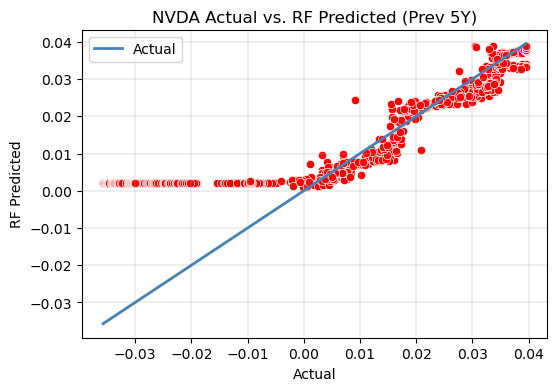

In [85]:
# Create scatter plot of Actual vs Predicted - RF model

# Create figure and axes
plt.figure(figsize=(6, 4))

sns.scatterplot(data=past_pred, x='Actual', y='Predicted RF', color='red', marker='o')
sns.lineplot(data=past_pred, x='Actual', y='Actual', label='Actual', color='steelblue', linewidth=2)

plt.title('NVDA Actual vs. RF Predicted (Prev 5Y)')
plt.xlabel('Actual')
plt.ylabel('RF Predicted')
plt.grid(linewidth=0.3)

plt.show()

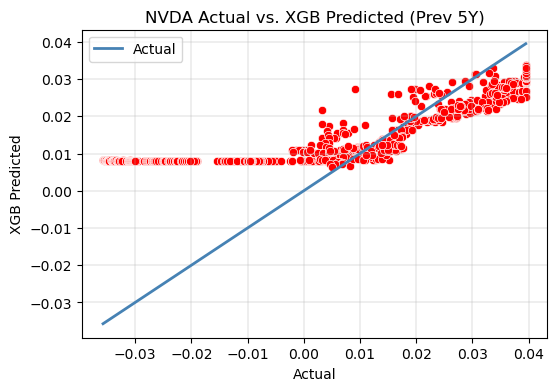

In [86]:
# Create scatter plot of Actual vs Predicted - XGB model

# Create figure and axes
plt.figure(figsize=(6, 4))

sns.scatterplot(data=past_pred, x='Actual', y='Predicted XGB', color='red', marker='o')
sns.lineplot(data=past_pred, x='Actual', y='Actual', label='Actual', color='steelblue', linewidth=2)

plt.title('NVDA Actual vs. XGB Predicted (Prev 5Y)')
plt.xlabel('Actual')
plt.ylabel('XGB Predicted')
plt.grid(linewidth=0.3)

plt.show()

In [78]:
# Calculate evaluation metrics

# Create lists of metrics and models
metrics = ['MSE', 'RMSE', 'MAE', 'R2']
models = ['MLR', 'RF', 'XGB']

# Create Score DataFrame
past_score_df = pd.DataFrame(columns=metrics, index=models, dtype=float)

for model in models:
    actual = past_pred['Actual']
    predicted = past_pred[f'Predicted {model}']
    mse = mean_squared_error(actual, predicted)
    past_score_df.loc[model, 'MSE'] = mse
    past_score_df.loc[model, 'RMSE'] = np.sqrt(mse)
    past_score_df.loc[model, 'MAE'] = mean_absolute_error(actual, predicted)
    past_score_df.loc[model, 'R2'] = r2_score(actual, predicted)

# Print to check
display(past_score_df)

,MSE,RMSE,MAE,R2
MLR,0.000016,0.004019,0.003394,0.975807
RF,0.000591,0.024312,0.018928,0.114625
XGB,0.000848,0.029112,0.023876,-0.269529
